# EDA

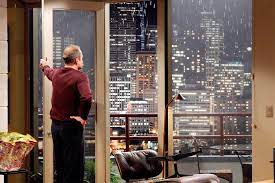

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import missingno as msno
from geopy.distance import geodesic
from scipy.stats import pearsonr
import optbinning as op
from scipy import stats
#from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import silhouette_score


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from cleaning import clean_data

In [2]:
df = pd.read_csv("data/_select_kchd_kchs_date_kchs_price_from_king_county_house_details_202512091053.csv")

In [3]:
df.shape

(21597, 21)

In [4]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [5]:
df.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

<Axes: >

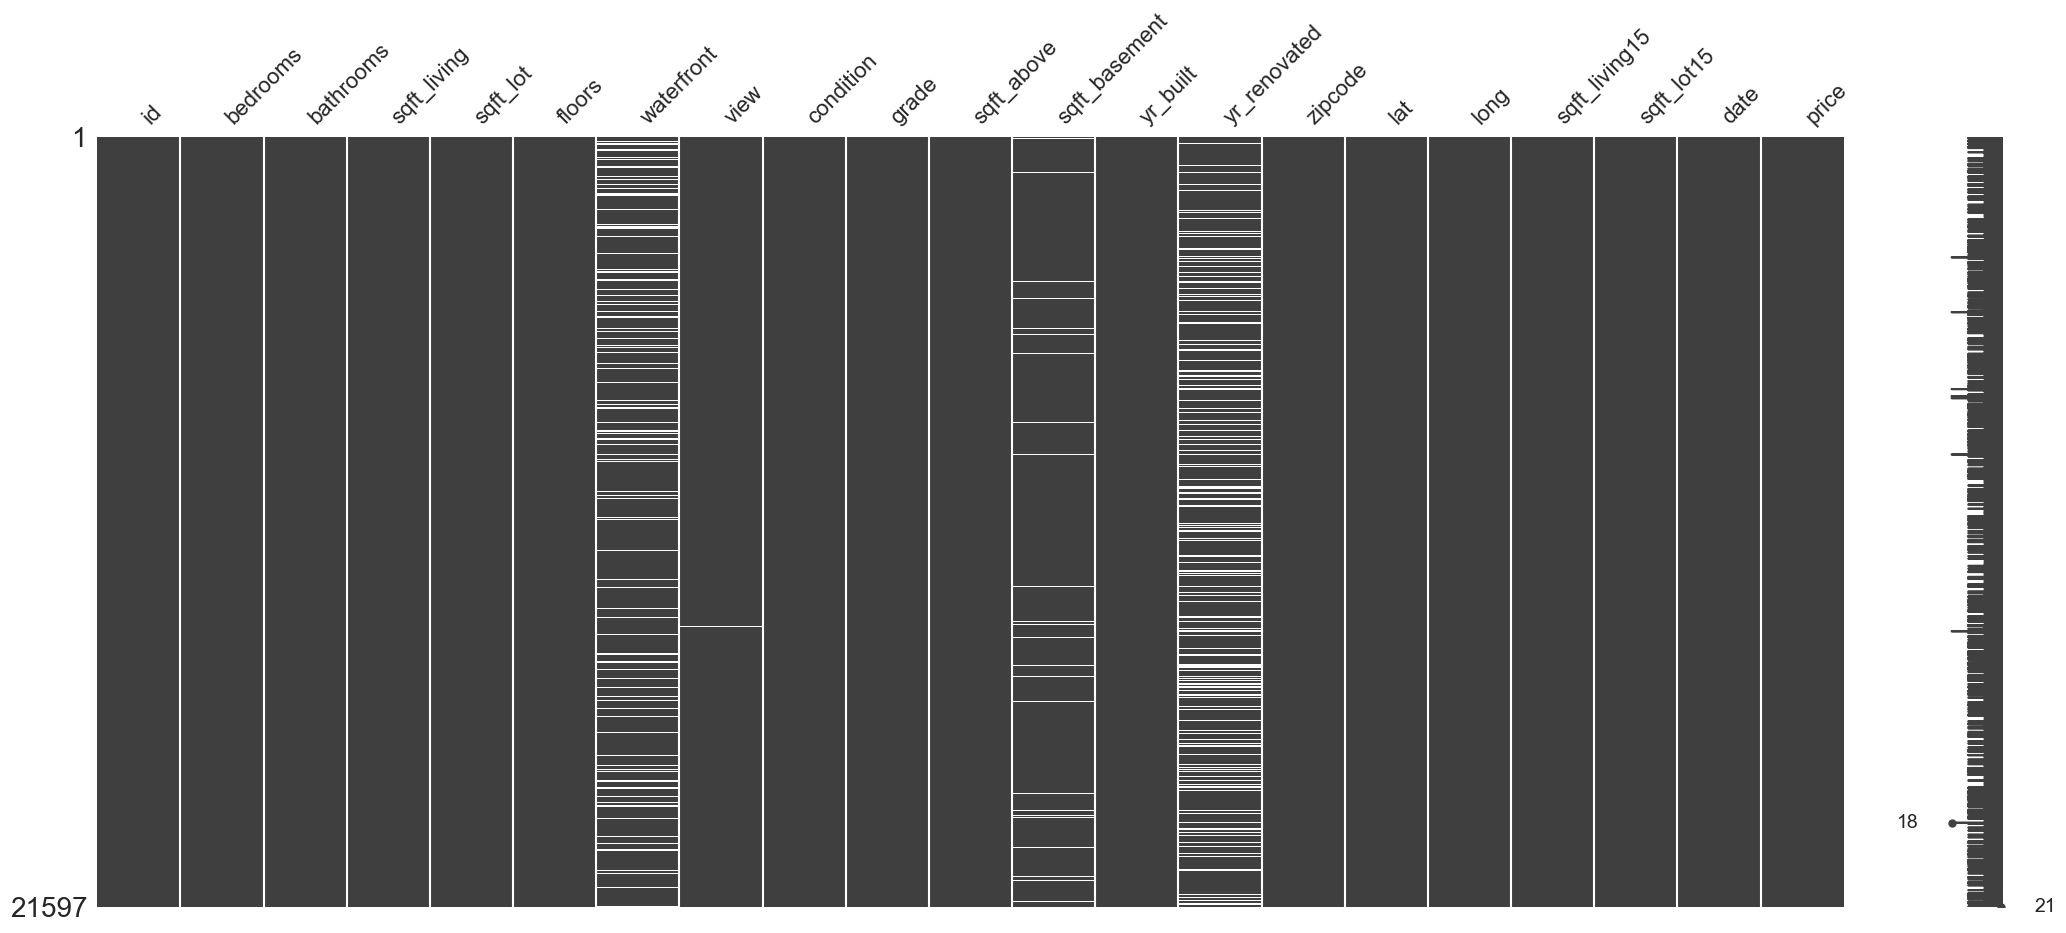

In [6]:
msno.matrix(df)

In [7]:
df = clean_data(df)

In [8]:
df.shape

(21597, 21)

In [9]:
df.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

In [10]:
df.dtypes

id                        int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
date             datetime64[ns]
price                     int64
dtype: object

In [11]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1.000,1180,5650,1,0,0,3,7,...,0,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900
1,6414100192,3,2.250,2570,7242,2,0,0,3,7,...,400,1951,1991,98125,47.721,-122.319,1690,7639,2014-12-09,538000
2,5631500400,2,1.000,770,10000,1,0,0,3,6,...,0,1933,0,98028,47.738,-122.233,2720,8062,2015-02-25,180000
3,2487200875,4,3.000,1960,5000,1,0,0,5,7,...,910,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000
4,1954400510,3,2.000,1680,8080,1,0,0,3,8,...,0,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000


In [12]:
df["distance_miles"] = df.apply(
    lambda r: geodesic(
        (r["lat"], r["long"]),   # ✅ row values
        (47.604, -122.334)
    ).miles,
    axis=1
)

In [13]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,distance_miles
0,7129300520,3,1.000,1180,5650,1,0,0,3,7,...,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900,7.353
1,6414100192,3,2.250,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.721,-122.319,1690,7639,2014-12-09,538000,8.113
2,5631500400,2,1.000,770,10000,1,0,0,3,6,...,1933,0,98028,47.738,-122.233,2720,8062,2015-02-25,180000,10.382
3,2487200875,4,3.000,1960,5000,1,0,0,5,7,...,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000,6.376
4,1954400510,3,2.000,1680,8080,1,0,0,3,8,...,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000,13.530


In [14]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'distance_miles'],
      dtype='object')

In [15]:
pearson_hypothesis1 = df["sqft_lot"].corr(df["sqft_lot15"])

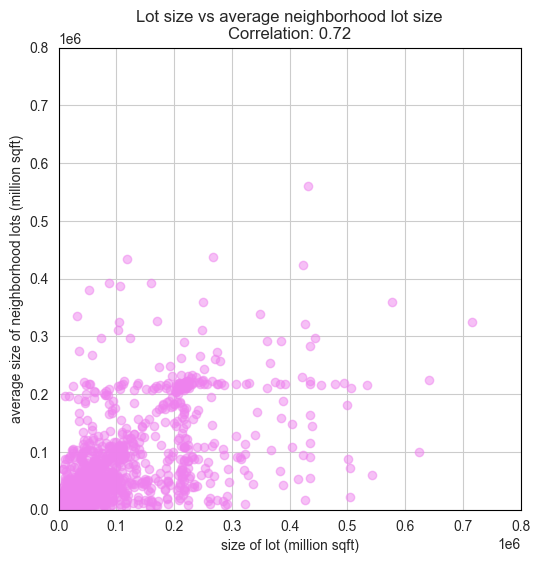

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))   # ⬅️ square figure

ax.scatter(df["sqft_lot"], df["sqft_lot15"], alpha=0.5, color='violet')

ax.set_aspect("equal", adjustable="box")
ax.ticklabel_format(axis="y", style="sci", scilimits=(6, 6))
ax.ticklabel_format(axis="x", style="sci", scilimits=(6, 6))
ax.set_xlabel("size of lot (million sqft)")
ax.set_ylabel("average size of neighborhood lots (million sqft)")
ax.set_xlim(0, 800000)
ax.set_ylim(0, 800000)
ax.set_title(f"Lot size vs average neighborhood lot size\nCorrelation: {pearson_hypothesis1:.2f}")

plt.show()

In [17]:
#Hypothesis Testing
#H0: There is no linear correlation between sqft_lot and sqft_lot15
#H1: There is a linear correlation between sqft_lot and sqft_lot15

x_hyph1 = df["sqft_lot"]
y_hyph1 = df["sqft_lot15"]

corr1, p_value1 = pearsonr(x_hyph1, y_hyph1)

corr1, p_value1

alpha1 = 0.05

if p_value1 < alpha1:
    print("There is a linear correlation between sqft_lot and sqft_lot15")
else:
    print("There is no linear correlation between sqft_lot and sqft_lot15")

There is a linear correlation between sqft_lot and sqft_lot15


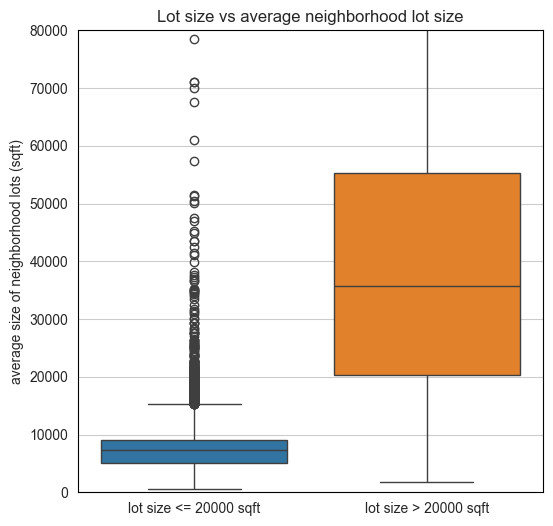

In [18]:
threshold = 20000

# Filter data
greater_than = df[df['sqft_lot'] > threshold]['sqft_lot15']
lesser_than = df[df['sqft_lot'] <= threshold]['sqft_lot15']

fig, ax = plt.subplots(figsize=(6, 6))   # ⬅️ square figure

# Combine into a new DataFrame for plotting
boxplot_df = pd.DataFrame({
    f'lot size <= {threshold} sqft': lesser_than,
    f'lot size > {threshold} sqft': greater_than
})

# Draw box plot
sns.boxplot(data=boxplot_df)
plt.ylabel('average size of neighborhood lots (sqft)')
plt.ylim(0,80000)
plt.title("Lot size vs average neighborhood lot size")
plt.show()

In [19]:
#Hypothesis 2: Larger lot sizes are further away from the city center

In [20]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'distance_miles'],
      dtype='object')

In [21]:
pearson_hypothesis2 = df["sqft_lot"].corr(df["distance_miles"])

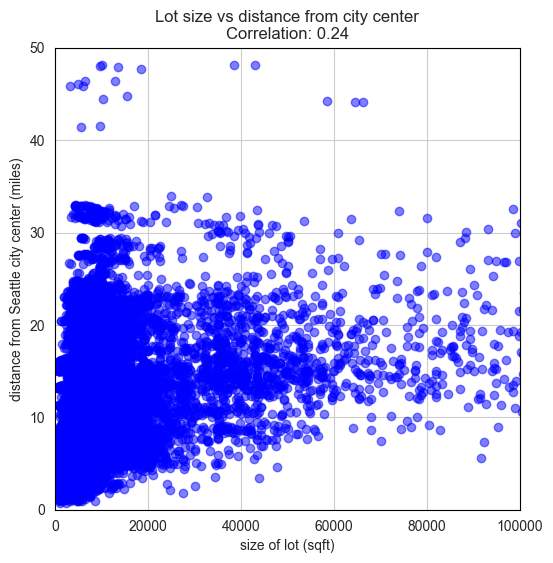

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))   # ⬅️ square figure

ax.scatter(df["sqft_lot"], df["distance_miles"], alpha=0.5, color = 'blue')

ax.set_xlabel("size of lot (sqft)")
ax.set_ylabel("distance from Seattle city center (miles)")
ax.set_xlim(0, 100000)
ax.set_ylim(0, 50)
ax.set_title(f"Lot size vs distance from city center\nCorrelation: {pearson_hypothesis2:.2f}")

plt.show()

In [23]:
#Hypothesis Testing
#H0: There is no linear correlation between sqft_lot and distance_miles
#H1: There is a linear correlation between sqft_lot and distance_miles

x_hyph2 = df["sqft_lot"]
y_hyph2 = df["distance_miles"]

corr2, p_value2 = pearsonr(x_hyph2, y_hyph2)

corr2, p_value2

alpha2 = 0.05

if p_value2 < alpha2:
    print("There is a linear correlation between sqft_lot and distance_miles")
else:
    print("There is no linear correlation between sqft_lot and distance_miles")

There is a linear correlation between sqft_lot and distance_miles


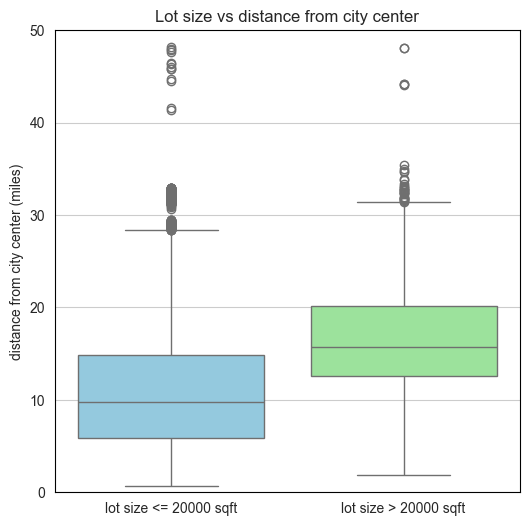

In [24]:
threshold = 20000

# Filter data
greater_than = df[df['sqft_lot'] > threshold]['distance_miles']
lesser_than = df[df['sqft_lot'] <= threshold]['distance_miles']

fig, ax = plt.subplots(figsize=(6, 6))   # ⬅️ square figure

# Combine into a new DataFrame for plotting
boxplot_df = pd.DataFrame({
    f'lot size <= {threshold} sqft': lesser_than,
    f'lot size > {threshold} sqft': greater_than
})

# Draw box plot
sns.boxplot(data=boxplot_df, palette=['skyblue', 'lightgreen'])
plt.ylabel('distance from city center (miles)')
plt.ylim(0,50)
plt.title("Lot size vs distance from city center")
plt.show()

In [25]:
#Hypothesis 3: Luxury houses have higher lot sizes

In [26]:
def cat_cat_correlation(df_,cat_col1,cat_col2):
    """
    This function spits out Cramer's correlation statistic, with Bergsma-Wicher 
    correction, between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df_[cat_col1], df_[cat_col2])
    chi_sqr = stats.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

In [27]:
#creating new feature
df['luxury'] = df['grade'] > 11

def cat_num_correlation(df_,cat_col,num_col):
    """
    This function spits out a sensible correlation coefficient
    between a categorical column and a numerical column of a dataframe.
    The correlation is essentially the corrected Cramer's correlation statistic,
    after the numerical data points have been transformed under optimal binning
    """
    _df = df_.copy()
    class_number = _df[cat_col].nunique()
    binning = op.MulticlassOptimalBinning()
    _df['binned_feature'] =binning.fit_transform(_df[num_col], _df[cat_col])
    result = cat_cat_correlation(_df,cat_col,'binned_feature')
    return round(result,3)

#calculating cramers v correlation
cramers_v_correlation = cat_num_correlation(df,'luxury','sqft_lot')

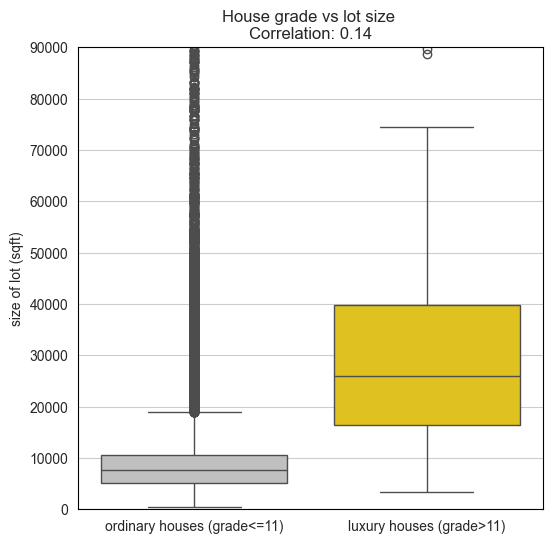

In [28]:
threshold_grade = 11

# Filter data
greater_than = df[df['grade'] > threshold_grade]['sqft_lot']
lesser_than = df[df['grade'] <= threshold_grade]['sqft_lot']

fig, ax = plt.subplots(figsize=(6, 6))   # ⬅️ square figure

# Combine into a new DataFrame for plotting
boxplot_df = pd.DataFrame({
    f'ordinary houses (grade<={threshold_grade})': lesser_than,
    f'luxury houses (grade>{threshold_grade})': greater_than
})

# Draw box plot
sns.boxplot(data=boxplot_df, palette=['silver', 'gold'])
plt.ylabel('size of lot (sqft)')
plt.ylim(0,90000)
plt.title(f"House grade vs lot size \nCorrelation: {cramers_v_correlation:.2f}")
plt.show()

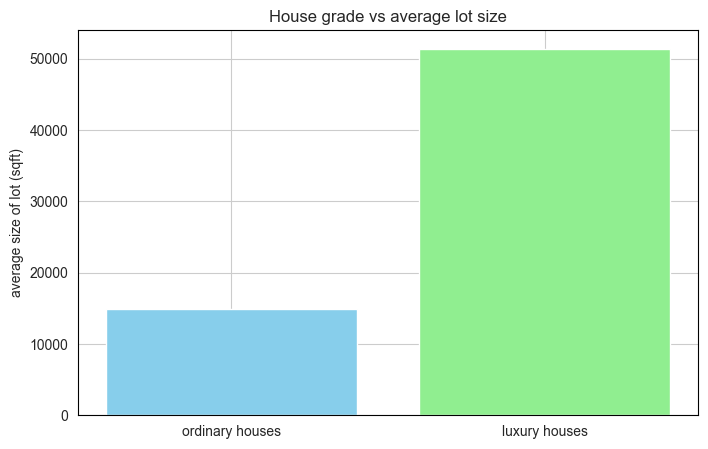

In [29]:
# Example data
categories = ['ordinary houses', 'luxury houses']
values = [df[df['grade'] <= threshold_grade]['sqft_lot'].mean(), df[df['grade'] > threshold_grade]['sqft_lot'].mean()]

# Create bar plot
plt.bar(categories, values, color=['skyblue', 'lightgreen'])  # Optional colors
plt.ylabel('average size of lot (sqft)')
plt.title('House grade vs average lot size')
plt.show()

In [30]:
#check if variances are significantly different
luxury = df[df['luxury'] == True]['sqft_lot']
non_luxury = df[df['luxury'] == False]['sqft_lot']

# Levene's test for equal variances
stat31, p_value31 = stats.levene(luxury, non_luxury)

print(f"Levene statistic: {stat31:.3f}, p-value: {p_value31:.3f}")

if p_value31 < 0.05:
    print("Reject H0: Variances are significantly different")
else:
    print("Fail to reject H0: No significant difference in variance")

Levene statistic: 37.343, p-value: 0.000
Reject H0: Variances are significantly different


In [31]:
#check if means are significantly different
# Two-sample t-test
stat32, p_value32 = stats.ttest_ind(luxury, non_luxury, equal_var=False)  # Welch's t-test

print(f"T-statistic: {stat32:.3f}, p-value: {p_value32:.3f}")

if p_value32 < 0.05:
    print("Reject H0: Means are significantly different")
else:
    print("Fail to reject H0: No significant difference in means")

T-statistic: 3.581, p-value: 0.001
Reject H0: Means are significantly different
